In [30]:
%matplotlib inline
import cv2 as cv
import numpy as np
import qrcode
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
# version — Accepts an integer from 1 to 40 which controls the size of the QR Code. The smallest version 1 has a dimension of 21 x 21.
# box_size — Determines the number of pixels for each box of the QR code.
# border — Determines the thickness of the border of the boxes. The default value is 4, which is the minimum size.
# error_correction — Controls the error correction used. It will be further explained in the next paragraph.
qr1 = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=5,
    border=4,
)

qr1.add_data('estonian_clay_mansion')
qr1.make(fit=True)

img1 = qr1.make_image(
    fill_color="black",
    back_color="white").convert('RGB')

img1.save("qr_code1.png")

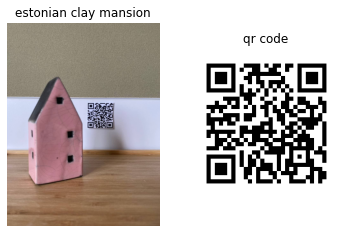

In [40]:
img1 = cv.imread('mantion2.jpg')
img2 = cv.imread('qr_code1.png')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
fig, axx = plt.subplots(1,2)
axx[0].set_title("estonian clay mansion")
axx[0].axis("off")
axx[0].imshow(img1_rgb)
axx[1].set_title("qr code")
axx[1].axis("off")
axx[1].imshow(img2)

plt.show()

detected string: estonian_clay_mansion


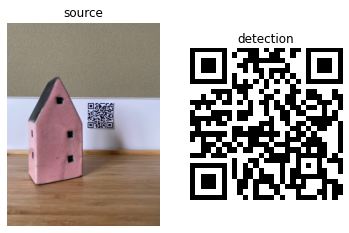

In [51]:
det = cv.QRCodeDetector()
# retval — Result in a string.
# points — Array of vertices of the found QR code quadrangle. Will be empty if not found.
# straight_qrcode — An image containing rectified and binarized QR code.
retval, points, straight_qrcode = det.detectAndDecode(img1)
# retval, points, straight_qrcode = det.detectAndDecode(img2)
print("detected string: {}".format(retval))
# print("detected points: {}".format(points))
# img_debug = img1_rgb.copy()
# cv.polylines(img_debug, points, True, (0, 0, 255), 5)

fig, axx = plt.subplots(1,2)
axx[0].set_title("source")
axx[0].axis("off")
axx[0].imshow(img1_rgb)
axx[1].set_title("detection")
axx[1].axis("off")
axx[1].imshow(cv2.cvtColor(straight_qrcode, cv2.COLOR_BGR2RGB))

plt.show()